In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree

In [3]:
# Load the depression dataset
dataset_path = 'C:/Users/Cindy/Downloads/Depression Dataset.csv'
dataset = pd.read_csv(dataset_path)

In [5]:
# Check for missing values
if dataset.isnull().sum().sum() > 0:
    print("Warning: Missing values detected! Please handle them before proceeding.")
else:
    print("No missing values detected.")

# Check for inconsistent entries
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"{column} - Unique Values: {unique_values}")

No missing values detected.
AGERNG - Unique Values: ['26-30' '21-25' '16-20' '31-35' '46-50' '41-45' '56-60' '36-40' '61+'
 '51-55']
GENDER - Unique Values: ['Female' 'Male']
EDU - Unique Values: ['Post Graduate' 'HSC' 'Graduate' 'SSC']
PROF - Unique Values: ['Unemployed' 'Service holder (Private)' 'Student'
 'Service holder (Government)' 'Other' 'Businessman']
MARSTS - Unique Values: ['Unmarried' 'Married' 'Divorced']
RESDPL - Unique Values: ['Town' 'City' 'Village']
LIVWTH - Unique Values: ['With Family' 'Without Family']
ENVSAT - Unique Values: ['Yes' 'No']
POSSAT - Unique Values: ['Yes' 'No']
FINSTR - Unique Values: ['No' 'Yes']
DEBT - Unique Values: ['No' 'Yes']
PHYEX - Unique Values: ['Sometimes' 'Never' 'Regularly']
SMOKE - Unique Values: ['No' 'Yes']
DRINK - Unique Values: ['Yes' 'No']
ILLNESS - Unique Values: ['No' 'Yes']
PREMED - Unique Values: ['No' 'Yes']
EATDIS - Unique Values: ['No' 'Yes']
AVGSLP - Unique Values: ['More than 8 hours' '6 hours' '8 hours' '7 hours' '5 hours

In [6]:
# Convert columns to categorical data type
for column in dataset.columns:
    dataset[column] = dataset[column].astype('category')

In [7]:
# Define columns for encoding
binary_columns = ['ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'SMOKE', 'DRINK', 'ILLNESS', 'PREMED', 
                  'EATDIS', 'INSOM', 'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 
                  'INFER', 'CONFLICT', 'LOST']
ordinal_columns = ['AVGSLP', 'TSSN', 'WRKPRE']
categorical_columns = ['AGERNG', 'GENDER', 'EDU', 'PROF', 'MARSTS', 'RESDPL', 'LIVWTH']

# Convert binary columns to numerical values
for col in binary_columns:
    dataset[col] = dataset[col].map({'Yes': 1, 'No': 0})

# Apply ordinal encoding for ordinal columns
ordinal_mappings = {
    'AVGSLP': {"Below 5 hours": 1, "5 hours": 2, "6 hours": 3, "7 hours": 4, "8 hours": 5, "More than 8 hours": 6},
    'TSSN': {"Less than 2 hours": 1, "2-4 hours a day": 2, "5-7 hours a day": 3, "8-10 hours a day": 4, "More than 10 hours": 5},
    'WRKPRE': {"No Pressure": 1, "Mild": 2, "Moderate": 3, "Severe": 4},
    'PHYEX': {"Never": 1, "Sometimes": 2, "Regularly": 3}
}

for col, mapping in ordinal_mappings.items():
    dataset[col] = dataset[col].map(mapping)

# Apply one-hot encoding for non-ordinal categorical columns
dataset = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [8]:
# Separate features and target variable
X = dataset.drop(columns=['DEPRESSED']) 
y = dataset['DEPRESSED'].cat.codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 86.78%
Precision: 0.87
Recall: 0.94
F1-Score: 0.90
Confusion Matrix:
[[33 11]
 [ 5 72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.87      0.94      0.90        77

    accuracy                           0.87       121
   macro avg       0.87      0.84      0.85       121
weighted avg       0.87      0.87      0.87       121



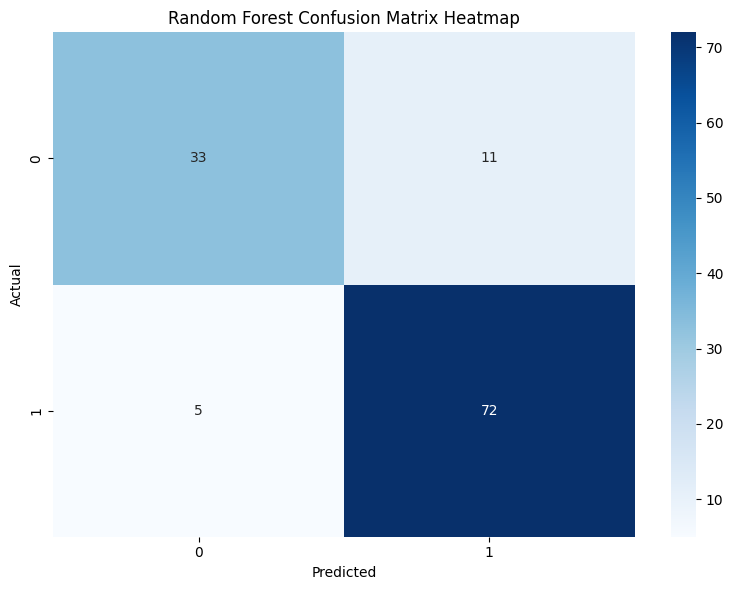

In [10]:
# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

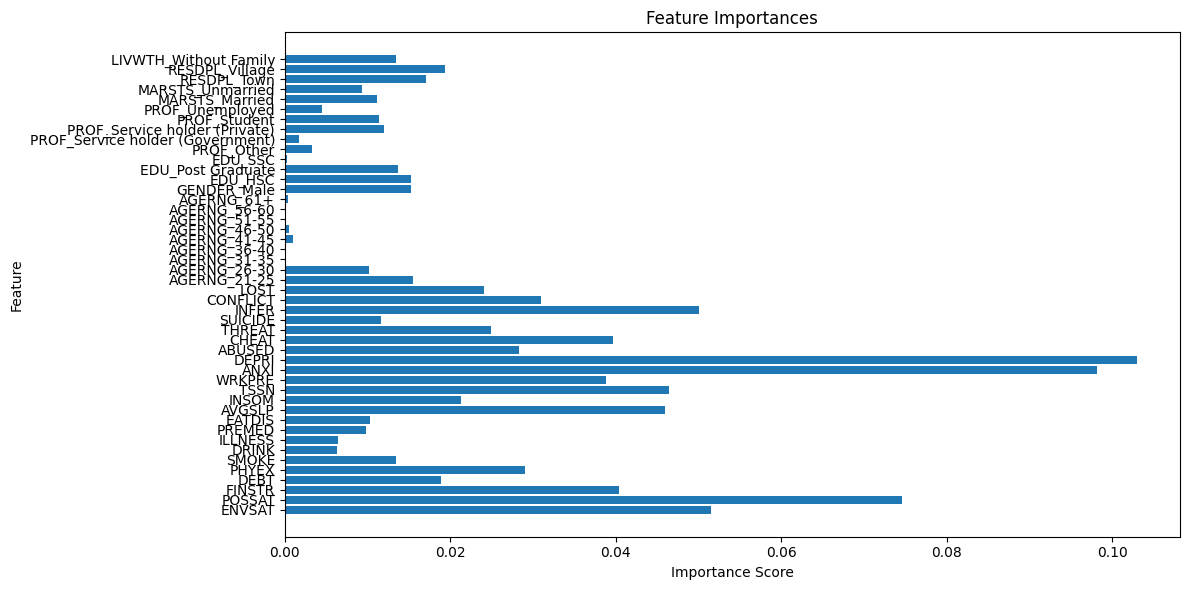

In [11]:
# Feature Importance Plot
feature_importances = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(12,6))
plt.barh(features, feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

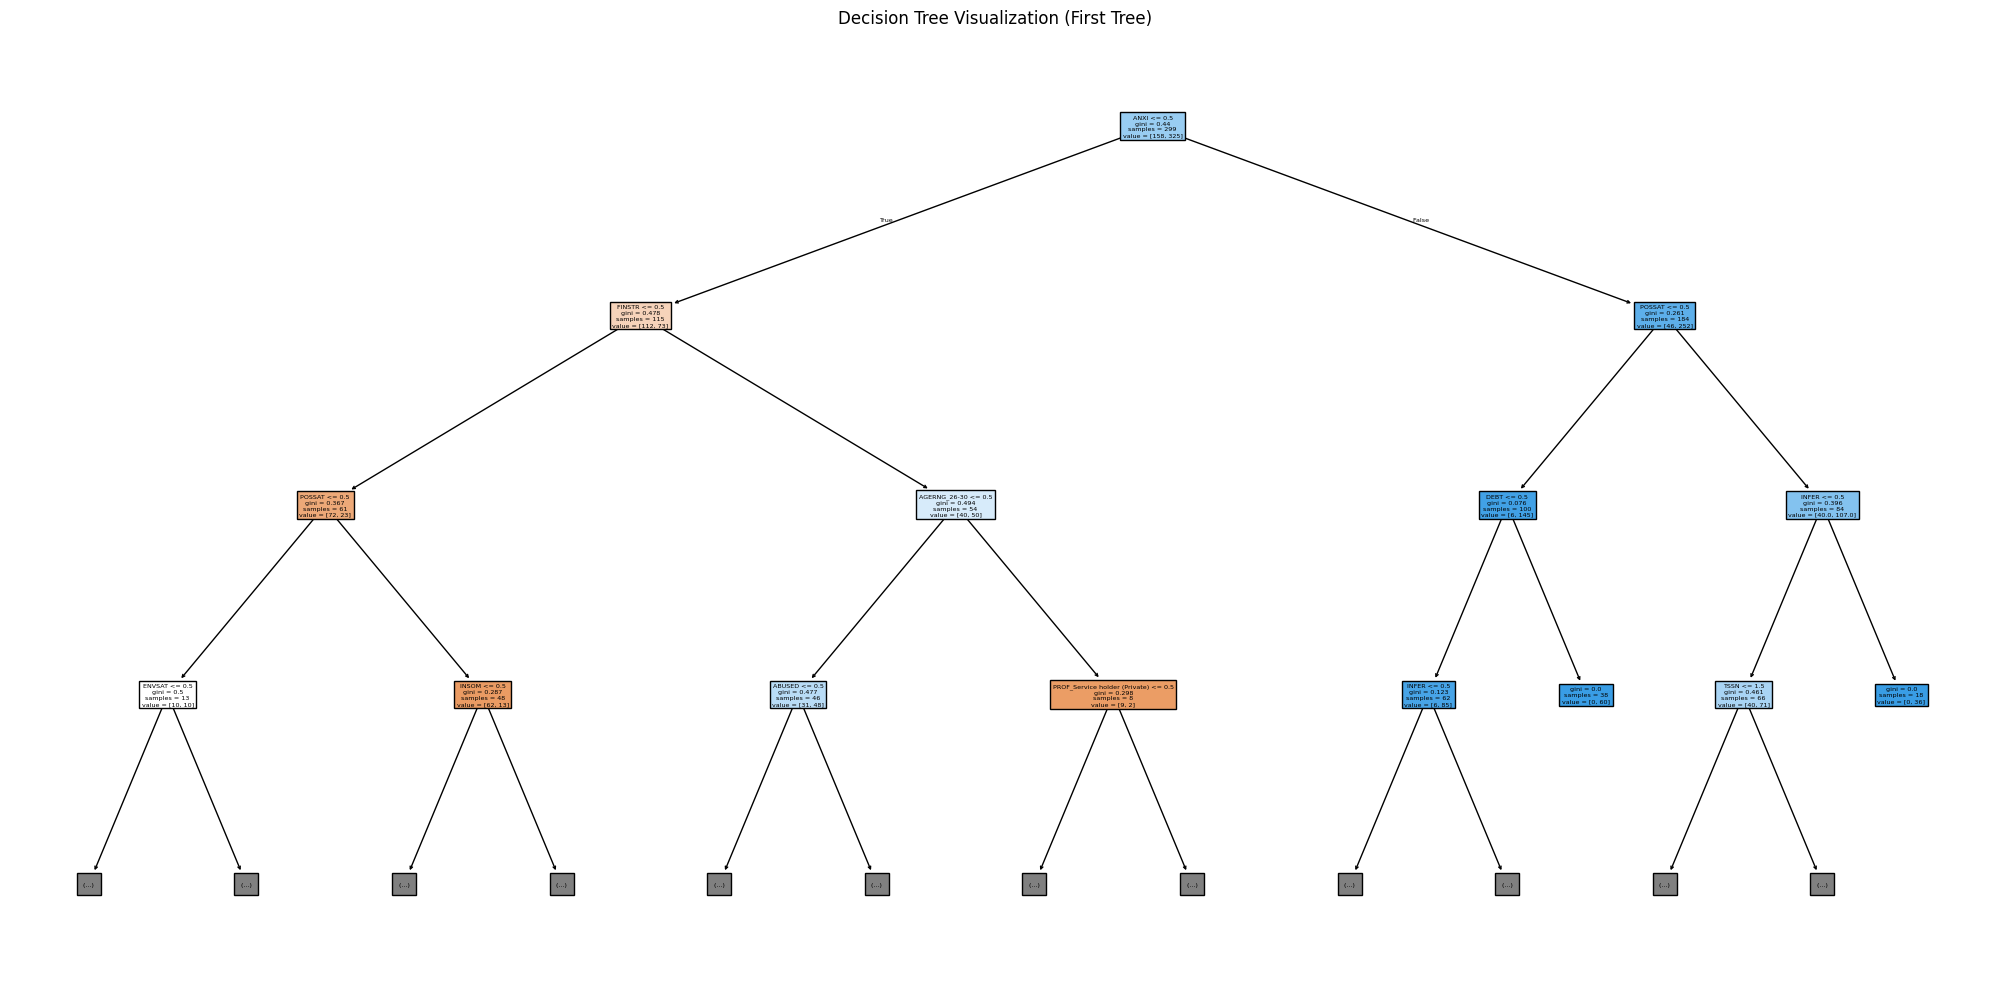

In [12]:
# Decision Tree Visualization (first tree in the forest)
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, max_depth=3)
plt.title("Decision Tree Visualization (First Tree)")
plt.tight_layout()
plt.show()